## Importing Libraries

In [106]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [107]:
model= tf.keras.models.load_model('trained_model.keras')

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualizing Single Image of Test Set

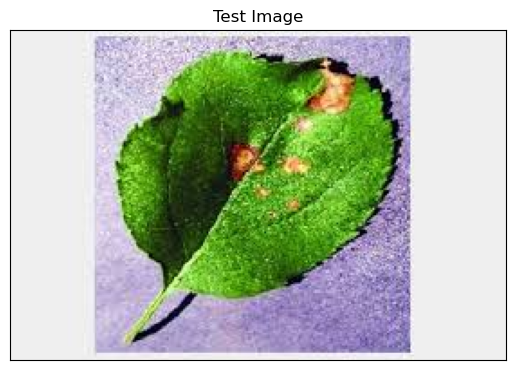

In [133]:
## We have to install opencv on python
## for that we use !pip install opencv-python
## here already installed using the same process
import cv2
image_path="test/test/sample.JPEG"
## reading the image 
img = cv2.imread(image_path) # displays image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR image to RGB
# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


## Testing Model

In [134]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr]) # it converts a single image to batch

In [135]:
print(input_arr.shape)

(1, 128, 128, 3)


In [136]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 31ms/step


(array([[1.6028491e-05, 2.9666686e-01, 2.7729575e-07, 2.8855380e-09,
         1.0007065e-04, 2.8824984e-11, 1.4511583e-09, 6.1198928e-12,
         1.6992710e-12, 6.8775041e-11, 4.5228421e-15, 8.7764734e-10,
         7.9346013e-10, 5.6929274e-14, 6.1449171e-14, 4.4832169e-10,
         1.4316165e-04, 1.8715600e-08, 6.8956131e-01, 9.1491209e-08,
         1.0659923e-08, 1.2892328e-09, 8.6496525e-11, 2.6521044e-12,
         1.7249388e-11, 7.7183987e-14, 9.3945546e-11, 5.5412555e-09,
         5.0603468e-09, 5.4650269e-03, 9.2994661e-08, 1.1770704e-07,
         8.0420226e-03, 4.3504159e-10, 4.9078080e-06, 6.0677990e-12,
         2.1012955e-08, 2.4017122e-10]], dtype=float32),
 (1, 38))

In [137]:
result_index= np.argmax(prediction)
result_index

18

In [138]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

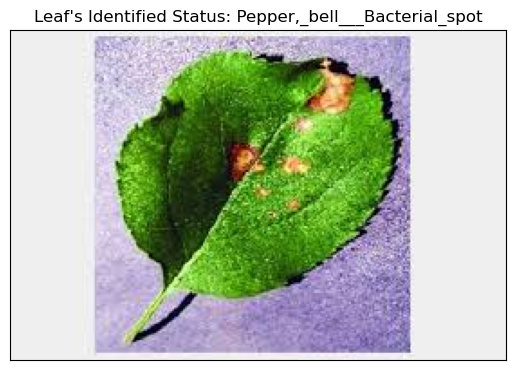

In [139]:
# Displaying Result of disease prediction
model_prediction= class_name[result_index]
plt.imshow(img)
plt.title(f"Leaf's Identified Status: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

## Comparing the sample image with original image of identified class
Now, I want to compare the sample image with that image of the identified class of valid set with whom it has shown maximum similarity